# Environmental News Sentiment Analyis & Classification Project

### Part I: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in csv data
df = pd.read_csv("../data/all-news.csv")

df.head()

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet
0,https://archive.org/details/FOXNEWS_20110315_1...,2011/03/15,FOXNEWS,Happening Now,FOXNEWS_20110315_150000_Happening_Now,https://archive.org/download/FOXNEWS_20110315_...,forward. greg: i suppose worth pointing out th...
1,https://archive.org/details/FOXNEWS_20110331_1...,2011/03/31,FOXNEWS,Americas Newsroom,FOXNEWS_20110331_130000_Americas_Newsroom,https://archive.org/download/FOXNEWS_20110331_...,threaten a government shutdown. that's what's ...
2,https://archive.org/details/FOXNEWS_20110330_1...,2011/03/30,FOXNEWS,America Live,FOXNEWS_20110330_170000_America_Live,https://archive.org/download/FOXNEWS_20110330_...,"and less likely. in any case, president obama ..."
3,https://archive.org/details/FOXNEWS_20110314_2...,2011/03/14,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110314_220000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110314_...,environmental catastrophe in another part of t...
4,https://archive.org/details/FOXNEWS_20110315_0...,2011/03/15,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110315_080000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110315_...,environmental catastrophe in another part of t...


In [3]:
print(f"Number of news snippets: {df.shape[0]}")

Number of news snippets: 94833


In [4]:
# Remove duplicated snippets and keep only the first one
df.drop_duplicates(subset="Snippet", keep="first", inplace=True)

In [5]:
print(f"Number of news snippets after dropping duplicates: {df.shape[0]}")

Number of news snippets after dropping duplicates: 90847


<AxesSubplot:title={'center':'Station Distribution in Data'}, xlabel='Station', ylabel='Frequency'>

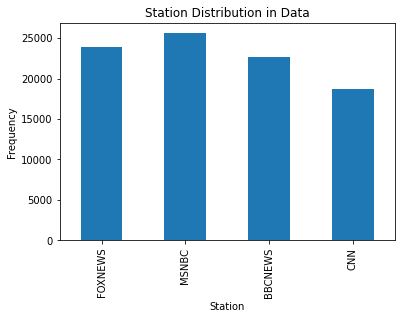

In [6]:
df['Station'].value_counts().reindex(['FOXNEWS', 'MSNBC', 'BBCNEWS', 'CNN']).plot(kind='bar', xlabel="Station", ylabel="Frequency", title="Station Distribution in Data") 

In [7]:
print(f"Number of null values: {df.isna().sum().sum()}")

Number of null values: 0


In [8]:
df["no_words"] = df.Snippet.apply(lambda x: len(x.split()))

df.head()

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet,no_words
0,https://archive.org/details/FOXNEWS_20110315_1...,2011/03/15,FOXNEWS,Happening Now,FOXNEWS_20110315_150000_Happening_Now,https://archive.org/download/FOXNEWS_20110315_...,forward. greg: i suppose worth pointing out th...,43
1,https://archive.org/details/FOXNEWS_20110331_1...,2011/03/31,FOXNEWS,Americas Newsroom,FOXNEWS_20110331_130000_Americas_Newsroom,https://archive.org/download/FOXNEWS_20110331_...,threaten a government shutdown. that's what's ...,47
2,https://archive.org/details/FOXNEWS_20110330_1...,2011/03/30,FOXNEWS,America Live,FOXNEWS_20110330_170000_America_Live,https://archive.org/download/FOXNEWS_20110330_...,"and less likely. in any case, president obama ...",36
3,https://archive.org/details/FOXNEWS_20110314_2...,2011/03/14,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110314_220000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110314_...,environmental catastrophe in another part of t...,27
5,https://archive.org/details/FOXNEWS_20110321_1...,2011/03/21,FOXNEWS,Studio B With Shepard Smith,FOXNEWS_20110321_190000_Studio_B_With_Shepard_...,https://archive.org/download/FOXNEWS_20110321_...,"century: energy. to have clean, safe, renewabl...",21


In [9]:
print(f"The average number of words in news snippets: {round(df.no_words.median())}")

The average number of words in news snippets: 41


### Sentiment Analysis of Environmental News Coverage ###

Guiding Questions:
- how do the sentiment of news coverage change over time?
- What are the distributions of sentiment for different Stations?

In [10]:
# The BERT sentiment analysis is run on Google Colab GPU for efficiency. 
news_sentiment_df = pd.read_csv("../data/all-news-sentiment.csv")

news_sentiment_df.head(10)

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet,sentiment,sentiment_score
0,https://archive.org/details/FOXNEWS_20110315_1...,2011/03/15,FOXNEWS,Happening Now,FOXNEWS_20110315_150000_Happening_Now,https://archive.org/download/FOXNEWS_20110315_...,forward. greg: i suppose worth pointing out th...,anger,0.885551
1,https://archive.org/details/FOXNEWS_20110331_1...,2011/03/31,FOXNEWS,Americas Newsroom,FOXNEWS_20110331_130000_Americas_Newsroom,https://archive.org/download/FOXNEWS_20110331_...,threaten a government shutdown. that's what's ...,joy,0.895025
2,https://archive.org/details/FOXNEWS_20110330_1...,2011/03/30,FOXNEWS,America Live,FOXNEWS_20110330_170000_America_Live,https://archive.org/download/FOXNEWS_20110330_...,"and less likely. in any case, president obama ...",anger,0.734057
3,https://archive.org/details/FOXNEWS_20110314_2...,2011/03/14,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110314_220000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110314_...,environmental catastrophe in another part of t...,anger,0.781867
4,https://archive.org/details/FOXNEWS_20110315_0...,2011/03/15,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110315_080000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110315_...,environmental catastrophe in another part of t...,anger,0.781867
5,https://archive.org/details/FOXNEWS_20110321_1...,2011/03/21,FOXNEWS,Studio B With Shepard Smith,FOXNEWS_20110321_190000_Studio_B_With_Shepard_...,https://archive.org/download/FOXNEWS_20110321_...,"century: energy. to have clean, safe, renewabl...",sadness,0.528857
6,https://archive.org/details/FOXNEWS_20110313_1...,2011/03/13,FOXNEWS,Americas News HQ,FOXNEWS_20110313_160000_Americas_News_HQ,https://archive.org/download/FOXNEWS_20110313_...,as they have tried to find alternatives to gre...,joy,0.956225
7,https://archive.org/details/FOXNEWS_20110315_1...,2011/03/15,FOXNEWS,FOX and Friends,FOXNEWS_20110315_100000_FOX_and_Friends,https://archive.org/download/FOXNEWS_20110315_...,in a political purgatory for 30 years. only th...,anger,0.474243
8,https://archive.org/details/FOXNEWS_20110313_1...,2011/03/13,FOXNEWS,FOX and Friends Sunday,FOXNEWS_20110313_110000_FOX_and_Friends_Sunday,https://archive.org/download/FOXNEWS_20110313_...,"no carbon greenhouse gas emissions. of course,...",anger,0.996656
9,https://archive.org/details/FOXNEWS_20110321_1...,2011/03/21,FOXNEWS,America Live,FOXNEWS_20110321_170000_America_Live,https://archive.org/download/FOXNEWS_20110321_...,"modern society, fight against drug trafficking...",anger,0.890172


In [11]:
news_sentiment_df.drop_duplicates(subset="Snippet", keep="first", inplace=True)

print(f"Number of news snippets after dropping duplicates: {df.shape[0]}")

Number of news snippets after dropping duplicates: 90847


<AxesSubplot:title={'center':'Tagged Sentiment Distribution in Data'}, xlabel='Sentiment', ylabel='Frequency'>

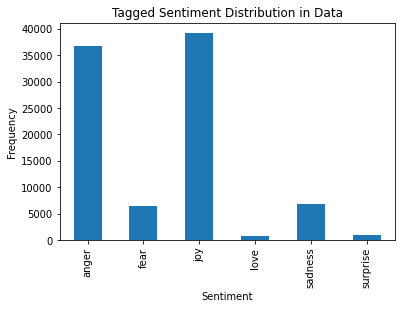

In [12]:
news_sentiment_df['sentiment'].value_counts().reindex(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']).plot(kind='bar', xlabel="Sentiment", ylabel="Frequency", title="Tagged Sentiment Distribution in Data") 

#### How do the sentiment of news coverage change over time? ####

In [13]:
print(f"earliest date: {news_sentiment_df.MatchDateTime.min()}")
print(f"latest date: {news_sentiment_df.MatchDateTime.max()}")

earliest date: 2009/07/02
latest date: 2020/01/21


In [14]:
news_sentiment_df.MatchDateTime

0        2011/03/15
1        2011/03/31
2        2011/03/30
3        2011/03/14
5        2011/03/21
            ...    
94828    2012/02/24
94829    2012/02/23
94830    2012/02/10
94831    2012/02/29
94832    2012/02/24
Name: MatchDateTime, Length: 90847, dtype: object

In [15]:
# create month-year column 

news_sentiment_df.MatchDateTime = pd.to_datetime(news_sentiment_df.MatchDateTime)
news_sentiment_df['month_year'] = news_sentiment_df.MatchDateTime.dt.to_period('M')
news_sentiment_df.head()

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet,sentiment,sentiment_score,month_year
0,https://archive.org/details/FOXNEWS_20110315_1...,2011-03-15,FOXNEWS,Happening Now,FOXNEWS_20110315_150000_Happening_Now,https://archive.org/download/FOXNEWS_20110315_...,forward. greg: i suppose worth pointing out th...,anger,0.885551,2011-03
1,https://archive.org/details/FOXNEWS_20110331_1...,2011-03-31,FOXNEWS,Americas Newsroom,FOXNEWS_20110331_130000_Americas_Newsroom,https://archive.org/download/FOXNEWS_20110331_...,threaten a government shutdown. that's what's ...,joy,0.895025,2011-03
2,https://archive.org/details/FOXNEWS_20110330_1...,2011-03-30,FOXNEWS,America Live,FOXNEWS_20110330_170000_America_Live,https://archive.org/download/FOXNEWS_20110330_...,"and less likely. in any case, president obama ...",anger,0.734057,2011-03
3,https://archive.org/details/FOXNEWS_20110314_2...,2011-03-14,FOXNEWS,Special Report With Bret Baier,FOXNEWS_20110314_220000_Special_Report_With_Br...,https://archive.org/download/FOXNEWS_20110314_...,environmental catastrophe in another part of t...,anger,0.781867,2011-03
5,https://archive.org/details/FOXNEWS_20110321_1...,2011-03-21,FOXNEWS,Studio B With Shepard Smith,FOXNEWS_20110321_190000_Studio_B_With_Shepard_...,https://archive.org/download/FOXNEWS_20110321_...,"century: energy. to have clean, safe, renewabl...",sadness,0.528857,2011-03


In [16]:
agg = news_sentiment_df.groupby(["month_year", "sentiment"])['URL'].count().reset_index()
agg.rename(columns={'URL': 'Count'}, inplace=True)

agg.head()

,month_year,sentiment,Count
0,2009-07,anger,258
1,2009-07,fear,31
2,2009-07,joy,265
3,2009-07,love,3
4,2009-07,sadness,55


In [17]:
agg = agg.pivot(index='month_year', columns='sentiment', values='Count')

In [18]:
agg

sentiment,anger,fear,joy,love,sadness,surprise
month_year,,,,,,
2009-07,258.0,31.0,265.0,3.0,55.0,2.0
2009-08,135.0,15.0,113.0,4.0,28.0,3.0
2009-09,152.0,8.0,206.0,2.0,26.0,NaN
2009-10,245.0,35.0,226.0,4.0,35.0,12.0
2009-11,288.0,44.0,314.0,8.0,24.0,2.0
...,...,...,...,...,...,...
2019-09,1491.0,274.0,1572.0,18.0,296.0,28.0
2019-10,485.0,153.0,460.0,25.0,82.0,13.0
2019-11,761.0,167.0,978.0,12.0,230.0,12.0


In [19]:
agg.fillna(0, inplace=True)

In [20]:
x = agg.index.to_timestamp()

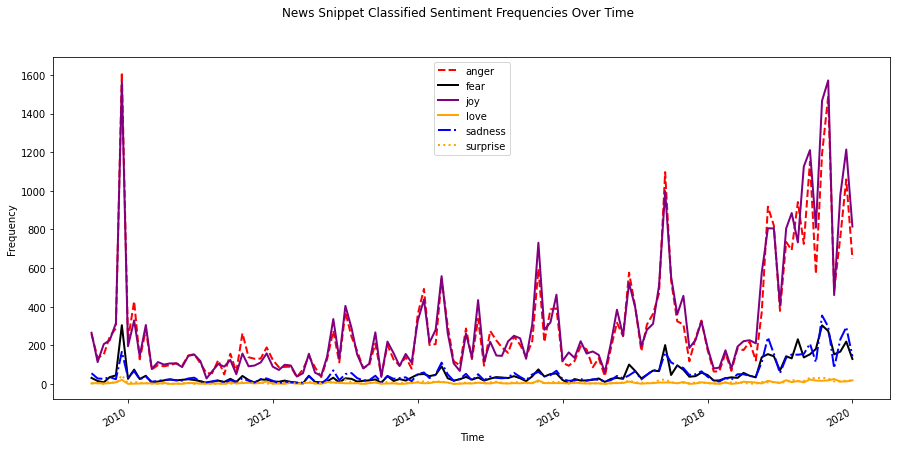

In [21]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


x = agg.index.to_timestamp()

fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(x, agg.anger.to_list(), color='red', markerfacecolor='black', markersize=2, linestyle="dashed", linewidth=2, label='anger')
plt.plot(x, agg.fear.to_list(), marker='', color='black', linewidth=2, linestyle="solid", label='fear')
plt.plot(x, agg.joy.to_list(), marker='', color='purple', linewidth=2, linestyle='solid', label='joy')
plt.plot(x, agg.love.to_list(), marker='', color='orange', linewidth=2, linestyle='solid', label='love')
plt.plot(x, agg.sadness.to_list(), marker='', color='blue', linewidth=2, linestyle='dashdot', label='sadness')
plt.plot(x, agg.surprise.to_list(), marker='', color='orange', linewidth=2, linestyle='dotted', label='surprise')


fig.autofmt_xdate()

fig.suptitle("News Snippet Classified Sentiment Frequencies Over Time")
ax.set(xlabel="Time", ylabel="Frequency")


plt.legend()
plt.show()

### Predicting the Broadcasting Station of Environmental News Snippet ###

#### Naive Bayes Classifier(Baseline) ####

In [22]:
df.Station.unique()

array(['FOXNEWS', 'MSNBC', 'BBCNEWS', 'CNN'], dtype=object)

In [23]:
# Generate labels for the broadcasting station
def generate_label(x):
    dict = {
        'FOXNEWS': 0,
        'MSNBC': 1,
        'BBCNEWS': 2,
        'CNN': 3
        }
    
    return dict[x]

In [24]:
df["label"] = df.Station.apply(generate_label)

In [25]:
df.label.value_counts()

1    25585
0    23837
2    22689
3    18736
Name: label, dtype: int64

In [53]:
# separate out training, validation and testing sets

X = df.Snippet.to_list()
y = df.label.to_list()

In [54]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

In [55]:
print(f"Training sample size: {len(X_train)}")
print(f"Validation sample size: {len(X_val)}")
print(f"Testing sample size: {len(X_test)}")

Training sample size: 65409
Validation sample size: 16353
Testing sample size: 9085


In [56]:
# Create a pipeline that calculates tf-idf score and trains an NB classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

In [30]:
text_clf = text_clf.fit(X_train, y_train)

In [31]:
predicted = text_clf.predict(X_test)
print(f"Test accuracy for Naive Bayes classifier: {round(np.mean(predicted == y_test), 3)}")

Test accuracy for Naive Bayes classifier: 0.607


In [57]:
# Apply Grid search to optimize hyperparameters

from sklearn.model_selection import GridSearchCV

parameters = {
    'tfidf__use_idf': (True, False),
    'clf__alpha': np.linspace(0.5, 1.5, 6),
    'clf__fit_prior': [True, False]
    }

In [35]:
gs_text_clf = GridSearchCV(text_clf, parameters, n_jobs=-1, verbose=2)
gs_text_results = gs_text_clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=True; total time=   6.7s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=True; total time=   6.8s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=True; total time=   6.8s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=True; total time=   6.8s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=True; total time=   6.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=False; total time=   6.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=False; total time=   6.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=False; total time=   6.3s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=False; total time=   6.4s
[CV] END clf__alpha=0.5, clf__fit_prior=True, tfidf__use_idf=False; total time=   6.3s
[CV] END clf__alpha=0.5, clf__fit_prior=False, tfidf__use_idf=True; total

In [36]:
print(gs_text_results.best_score_)
print(gs_text_results.best_params_)

0.6346068627166932
{'clf__alpha': 0.5, 'clf__fit_prior': False, 'tfidf__use_idf': True}


In [37]:
predicted = gs_text_results.predict(X_test)
print(f"Test accuracy for Grid Search Naive Bayes: {round(np.mean(predicted == y_test), 3)}")

Test accuracy for Grid Search Naive Bayes: 0.635


#### Support Vector Machine

In [58]:
# Build a pipeline for Support Vector Machine

from sklearn.linear_model import SGDClassifier

text_clf_svm = Pipeline(
    [
        ('tfidf', TfidfVectorizer()),
        ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)),
    ])

In [59]:
text_clf_svm = text_clf_svm.fit(X_train, y_train)

In [60]:
predicted = text_clf_svm.predict(X_test)
print(f"Test accuracy for SVM: {round(np.mean(predicted == y_test), 3)}")

Test accuracy for SVM: 0.562


In [62]:
# Apply Grid search to optimize hyperparameters
parameters_svm = {
    'tfidf__use_idf': (True, False),
    'clf-svm__alpha': np.linspace(0.001, 0.1, 10)
    }

In [63]:
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1, verbose=2)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........clf-svm__alpha=0.001, tfidf__use_idf=True; total time=  12.9s
[CV] END ..........clf-svm__alpha=0.001, tfidf__use_idf=True; total time=  12.9s
[CV] END ..........clf-svm__alpha=0.001, tfidf__use_idf=True; total time=  12.9s
[CV] END ..........clf-svm__alpha=0.001, tfidf__use_idf=True; total time=  13.0s
[CV] END ..........clf-svm__alpha=0.001, tfidf__use_idf=True; total time=   8.1s
[CV] END .........clf-svm__alpha=0.001, tfidf__use_idf=False; total time=   8.7s
[CV] END .........clf-svm__alpha=0.001, tfidf__use_idf=False; total time=   8.8s
[CV] END .........clf-svm__alpha=0.001, tfidf__use_idf=False; total time=   8.7s
[CV] END .........clf-svm__alpha=0.001, tfidf__use_idf=False; total time=   8.7s
[CV] END .........clf-svm__alpha=0.001, tfidf__use_idf=False; total time=   8.9s
[CV] END ..........clf-svm__alpha=0.012, tfidf__use_idf=True; total time=   9.0s
[CV] END ..........clf-svm__alpha=0.012, tfidf_

In [64]:
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

0.5625677734491713
{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True}


In [65]:
predicted = gs_clf_svm.predict(X_test)
print(f"Test accuracy for Grid Search SVM: {round(np.mean(predicted == y_test), 3)}")

Test accuracy for Grid Search SVM: 0.562


#### Deep Neural Network

In [32]:
import tensorflow as tf

In [66]:
# Generate tf-idf score for X_train and X_test

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [67]:
import scipy

# convert sparse matrix to normal dense matrix before feeding to neural network
X_train = scipy.sparse.csr_matrix.todense(X_train)
X_val = scipy.sparse.csr_matrix.todense(X_val)
X_test = scipy.sparse.csr_matrix.todense(X_test)

In [68]:
# Convert label list to np arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [69]:
# 3-layer neural network
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(df.label.nunique(), activation='softmax')
])

In [70]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2385920   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2,388,132
Trainable params: 2,388,132
Non-trainable params: 0
_________________________________________________________________


In [71]:
X_train.shape, X_val.shape, X_test.shape

((65409, 37279), (16353, 37279), (9085, 37279))

In [42]:
for i in range(X_test.shape[0]):
    assert X_train[i].shape[1] == 37279

In [72]:
y_train.shape, y_val.shape, y_test.shape

((65409,), (16353,), (9085,))

In [73]:
%%time
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=2)

Epoch 1/10
2045/2045 - 72s - loss: 0.9413 - accuracy: 0.5881 - val_loss: 0.8135 - val_accuracy: 0.6503 - 72s/epoch - 35ms/step
Epoch 2/10
2045/2045 - 59s - loss: 0.6407 - accuracy: 0.7417 - val_loss: 0.8071 - val_accuracy: 0.6652 - 59s/epoch - 29ms/step
Epoch 3/10
2045/2045 - 68s - loss: 0.4559 - accuracy: 0.8224 - val_loss: 0.8651 - val_accuracy: 0.6689 - 68s/epoch - 33ms/step
Epoch 4/10
2045/2045 - 54s - loss: 0.3090 - accuracy: 0.8851 - val_loss: 1.0100 - val_accuracy: 0.6655 - 54s/epoch - 26ms/step
Epoch 5/10
2045/2045 - 58s - loss: 0.2016 - accuracy: 0.9285 - val_loss: 1.1679 - val_accuracy: 0.6713 - 58s/epoch - 28ms/step
Epoch 6/10
2045/2045 - 56s - loss: 0.1379 - accuracy: 0.9518 - val_loss: 1.3631 - val_accuracy: 0.6686 - 56s/epoch - 27ms/step
Epoch 7/10
2045/2045 - 52s - loss: 0.0959 - accuracy: 0.9676 - val_loss: 1.5597 - val_accuracy: 0.6700 - 52s/epoch - 25ms/step
Epoch 8/10
2045/2045 - 53s - loss: 0.0724 - accuracy: 0.9753 - val_loss: 1.7752 - val_accuracy: 0.6709 - 53s/ep

In [74]:
y_test_hat = model.predict(X_test)
y_test_hat = np.argmax(y_test_hat,axis=1)
print(f"Test accuracy for Neural Network: {round(np.mean(y_test_hat == y_test), 3)}")

Test accuracy for Neural Network: 0.664


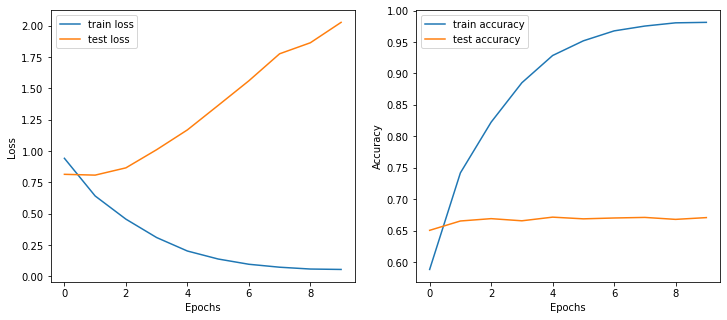

In [75]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss'])
ax = plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy'])